<a href="https://colab.research.google.com/github/jaiswalgaurav012002/deep_learning_project/blob/main/CNN%2B_Bidirectional_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow tensorflow-gpu pandas matplotlib sklearn


  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [39 lines of output]
      Traceback (most recent call last):
        File "/opt/conda/lib/python3.10/site-packages/setuptools/_vendor/packaging/requirements.py", line 35, in __init__
          parsed = _parse_requirement(requirement_string)
        File "/opt/conda/lib/python3.10/site-packages/setuptools/_vendor/packaging/_parser.py", line 64, in parse_requirement
          return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
        File "/opt/conda/lib/python3.10/site-packages/setuptools/_vendor/packaging/_parser.py", line 82, in _parse_requirement
          url, specifier, marker = _parse_requirement_details(tokenizer)
        File "/opt/conda/lib/python3.10/site-packages/setuptools/_vendor/packaging/_parser.py", line 126, in _parse_requirement_details
          marker = _parse_requirement_marker(
        File 

In [ ]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np

2024-05-01 12:29:57.197576: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-01 12:29:57.197686: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-01 12:29:57.315902: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
import os
import pandas as pd

file_path = '/kaggle/input/traindata1/train.csv'

if os.path.exists(file_path):
    df = pd.read_csv(file_path)
    print("file has been found")
else:
    print(f"File not found: {file_path}. Please upload the dataset or correct the file path.")

file has been found


In [ ]:
import pandas as pd

# Path to your CSV file
file_path = '/kaggle/input/traindata1/train.csv'  # Update with your CSV file path

# Read the CSV into a DataFrame
df = pd.read_csv(file_path)

# Display the DataFrame
print(df.head())  # Show the first few rows

                 id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  
3             0        0       0       0              0  
4             0        0       0       0              0  


In [ ]:
df.head(20)


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [ ]:
!pip list


Package                                  Version
---------------------------------------- -------------------
absl-py                                  1.4.0
accelerate                               0.29.3
access                                   1.1.9
affine                                   2.4.0
aiobotocore                              2.12.3
aiofiles                                 22.1.0
aiohttp                                  3.9.1
aiohttp-cors                             0.7.0
aioitertools                             0.11.0
aiorwlock                                1.3.0
aiosignal                                1.3.1
aiosqlite                                0.19.0
albumentations                           1.4.0
alembic                                  1.13.1
altair                                   5.3.0
annotated-types                          0.6.0
annoy                                    1.17.3
anyio                                    4.2.0
apache-beam                          

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:86: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
6982/6982 ━━━━━━━━━━━━━━━━━━━━ 225s 31ms/step - accuracy: 0.9706 - binary_accuracy: 0.9750 - categorical_accuracy: 0.9706 - loss: 0.0799 - val_accuracy: 0.9940 - val_binary_accuracy: 0.9820 - val_categorical_accuracy: 0.9940 - val_loss: 0.0491
Epoch 2/5
6982/6982 ━━━━━━━━━━━━━━━━━━━━ 258s 31ms/step - accuracy: 0.9894 - binary_accuracy: 0.9834 - categorical_accuracy: 0.9894 - loss: 0.0446 - val_accuracy: 0.9915 - val_binary_accuracy: 0.9823 - val_categorical_accuracy: 0.9915 - val_loss: 0.0483
Epoch 3/5
6982/6982 ━━━━━━━━━━━━━━━━━━━━ 221s 32ms/step - accuracy: 0.9896 - binary_accuracy: 0.9855 - categorical_accuracy: 0.9896 - loss: 0.0375 - val_accuracy: 0.9923 - val_binary_accuracy: 0.9808 - val_categorical_accuracy: 0.9923 - val_loss: 0.0504
Epoch 4/5
6982/6982 ━━━━━━━━━━━━━━━━━━━━ 219s 31ms/step - accuracy: 0.9413 - binary_accuracy: 0.9876 - categorical_accuracy: 0.9413 - loss: 0.0312 - val_accuracy: 0.9925 - val_binary_accuracy: 0.9819 - val_categorical_accuracy: 0.9925 - v

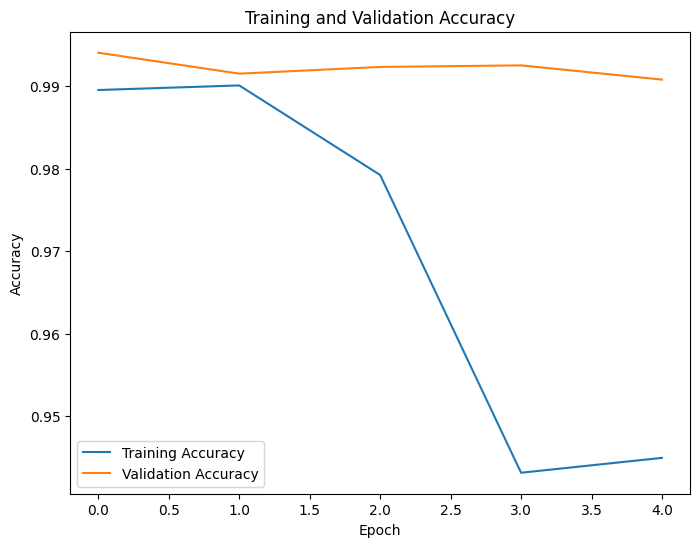

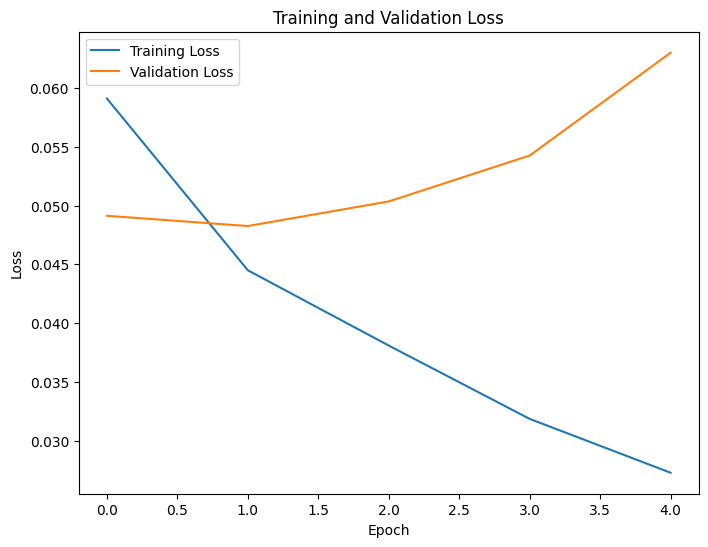

499/499 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step
Accuracy: 0.92
Precision: 0.78
Recall: 0.67
F1 Score: 0.71
Mean Squared Error (MSE): 0.01
Root Mean Squared Error (RMSE): 0.12
Mean Absolute Error (MAE): 0.02
ROC AUC: 0.97


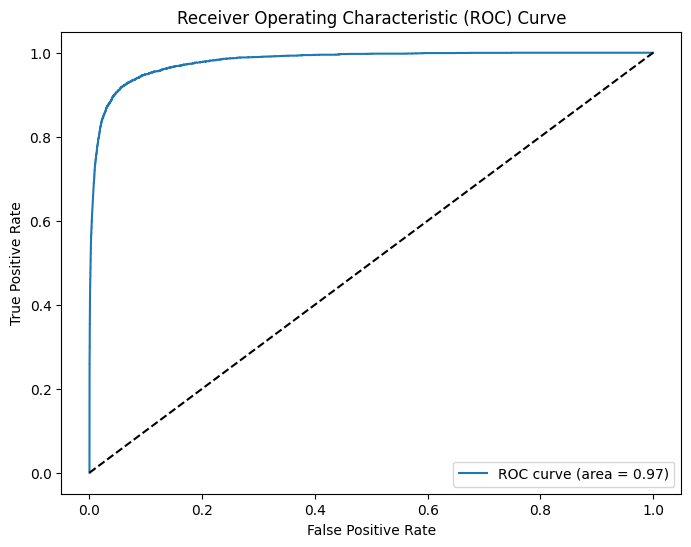

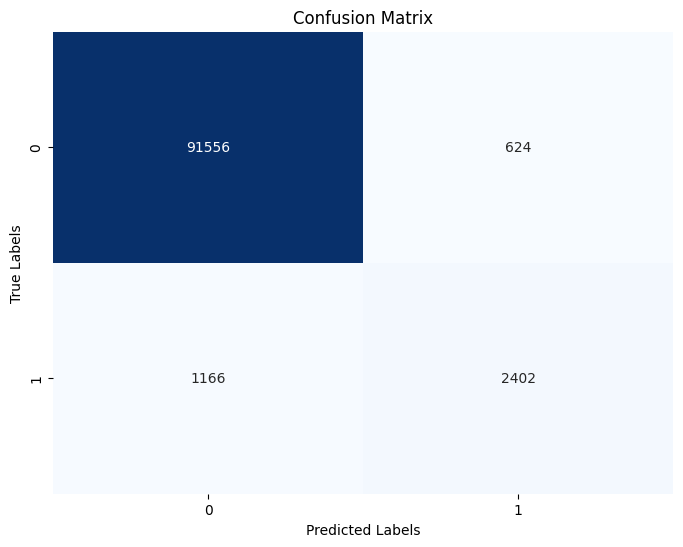

In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization, Embedding, Bidirectional, LSTM, Conv1D, MaxPooling1D, Dense, GlobalMaxPooling1D
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, mean_absolute_error, roc_curve, roc_auc_score, confusion_matrix

# Path to your CSV file
file_path = '/kaggle/input/traindata1/train.csv'  # Update with your CSV file path

# Read the CSV into a DataFrame
df = pd.read_csv(file_path)

X = df['comment_text']
y = df[df.columns[2:]].values

MAX_FEATURES = 20000  # Number of words in the vocabulary
MAX_SEQUENCE_LENGTH = 1800  # Maximum length of input sequences

# Text vectorization layer
vectorizer = TextVectorization(max_tokens=MAX_FEATURES,
                               output_sequence_length=MAX_SEQUENCE_LENGTH)
vectorizer.adapt(X.values)
vectorized_text = vectorizer(X.values)

# Split the dataset into train, validation, and test sets
train_size = int(len(X) * 0.7)
val_size = int(len(X) * 0.2)

X_train = vectorized_text[:train_size]
y_train = y[:train_size]
X_val = vectorized_text[train_size:train_size + val_size]
y_val = y[train_size:train_size + val_size]
X_test = vectorized_text[train_size + val_size:]
y_test = y[train_size + val_size:]

# Model definition
model = Sequential([
    Embedding(input_dim=MAX_FEATURES, output_dim=128, input_length=MAX_SEQUENCE_LENGTH),
    Conv1D(128, 5, activation='relu'),
    MaxPooling1D(5),
    Bidirectional(LSTM(64)),
    Dense(64, activation='relu'),
    Dense(y.shape[1], activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', 'binary_accuracy', 'categorical_accuracy'])

# Model summary
#print(model.summary())

# Train the model
history = model.fit(
    X_train,
    y_train,
    epochs=5,
    batch_size=16,
    validation_data=(X_val, y_val)
)

# Plot the training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot the training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Evaluate the model on the test set
y_pred = model.predict(X_test)

# Convert predictions and true labels to binary
y_pred_binary = (y_pred > 0.5).astype(int)
y_test_binary = y_test

# Calculate evaluation metrics
accuracy = accuracy_score(y_test_binary, y_pred_binary)
precision = precision_score(y_test_binary, y_pred_binary, average='weighted')
recall = recall_score(y_test_binary, y_pred_binary, average='weighted')
f1 = f1_score(y_test_binary, y_pred_binary, average='weighted')
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test_binary.ravel(), y_pred.ravel())
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test_binary.ravel(), y_pred_binary.ravel())
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Example input text
input_text = 'Shut Up you fucking bastard.'

# Vectorize the text input and ensure it has a batch dimension
vectorized_text = vectorizer(tf.constant([input_text]))  # Wrap the input in a list for batch dimension

# Make a prediction
res = model.predict(vectorized_text)

# Convert the result to binary (threshold at 0.5)
binary_res = (res > 0.5).astype(int)

print("Prediction:", binary_res)  # Display the prediction


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
Prediction: [[1 1 1 0 1 0]]


In [ ]:
# Example input text
input_text = 'Good morning my friend'

# Vectorize the text input and ensure it has a batch dimension
vectorized_text = vectorizer(tf.constant([input_text]))  # Wrap the input in a list for batch dimension

# Make a prediction
res = model.predict(vectorized_text)

# Convert the result to binary (threshold at 0.5)
binary_res = (res > 0.5).astype(int)

print("Prediction:", binary_res)  # Display the prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Prediction: [[0 0 0 0 0 0]]
